In [19]:
import numpy as np
from matplotlib import pyplot as plt
from metrics import mean_Euclidean_dist, normalize

import matplotlib.ticker as mticker

/tmp/ipykernel_2292425/2410728099.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5.0)


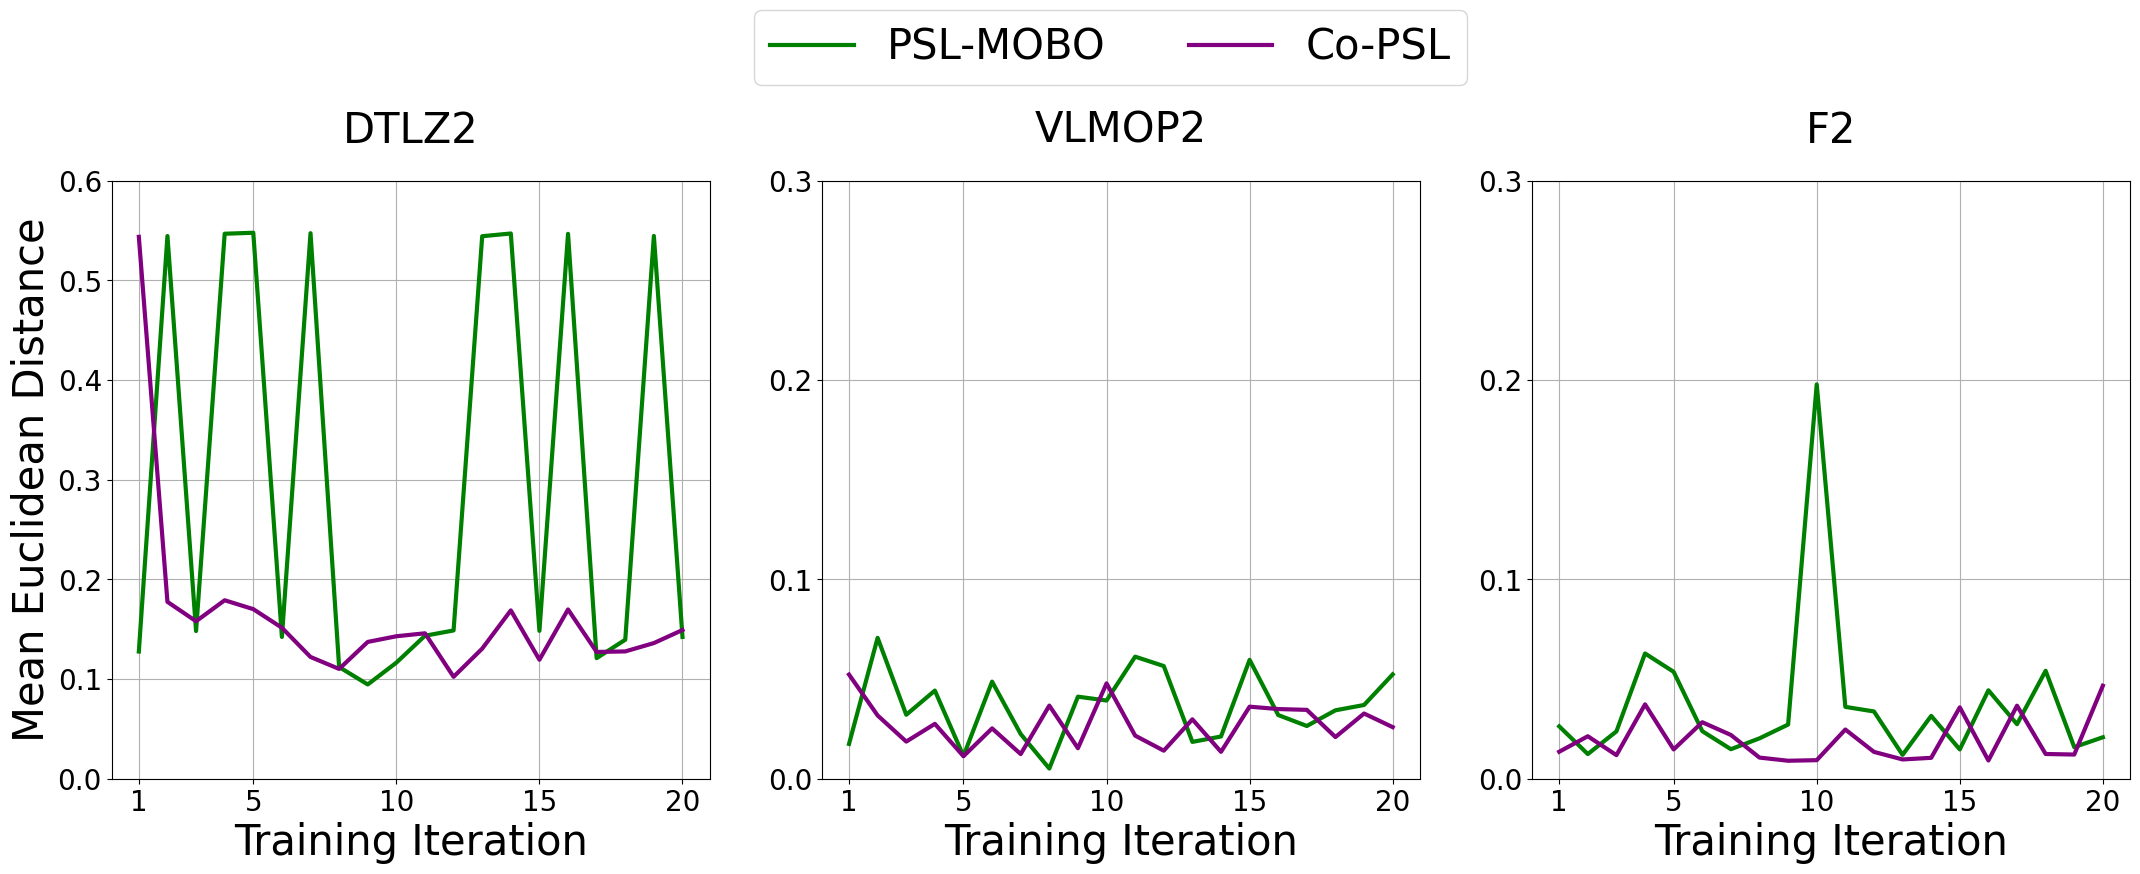

In [20]:
problem_names = ['DTLZ2', 'VLMOP2', 'F2']
font_size = 20
seed = 44
fig, axs = plt.subplots(figsize = (22, 10), ncols = 3, nrows=1, layout="constrained")
fig.tight_layout(pad=5.0)
axs.flatten()
for index, problem_name in enumerate(problem_names):
    n_dim = 6 if problem_name in ["DTLZ2", "F2"] else 4
    truth_front = np.load(f"logs_{problem_name}_final/PrefParetoTruth.npy")
    # print(truth_front.shape)
    front_Co_PSL = np.load(f"logs_{problem_name}_final/front_{problem_name}_6_Co-PSL_{seed}.npy")
    front_PSL_MOBO = np.load(f"logs_{problem_name}_final/front_{problem_name}_6_PSL-MOBO_{seed}.npy")
    MED_Co_PSL, MED_PSL_MOBO = [], []
    for i in range(20):
        MED_Co_PSL.append(mean_Euclidean_dist(truth_front, front_Co_PSL[i]))
    for i in range(20, 40): 
        MED_PSL_MOBO.append(mean_Euclidean_dist(truth_front, front_PSL_MOBO[i])) 
    axs[index].set_box_aspect(1)
    axs[index].plot(MED_PSL_MOBO, color = "green", label = "PSL-MOBO" if index == 0 else "", linewidth=3,)
    axs[index].plot(MED_Co_PSL, color = "purple", label = "Co-PSL" if index == 0 else "", linewidth=3,)
    if index == 0:
        axs[index].set_ylabel("Mean Euclidean Distance", fontsize = font_size+10)
    axs[index].set_xticks([0, 4, 9, 14, 19])
    axs[index].set_xticklabels([1, 5, 10, 15, 20], fontsize = font_size)
    max_y = 6 if index == 0 else 3
    y_label = np.arange(0, max_y + 1, 1) / 10
    
    axs[index].set_ylim(0., max_y/10)   
    axs[index].set_yticks(y_label)
    axs[index].set_yticklabels(y_label, fontsize = font_size)
    axs[index].set_xlabel("Training Iteration", fontsize = font_size+10)
    
    axs[index].set_title(f'{problem_name}', y = 1.05, fontsize = font_size+10)
    axs[index].grid()
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.0), ncols=2, fontsize = font_size+10)
plt.savefig("visualization_plot/Result_MED_final.pdf", bbox_inches='tight')
plt.show()        